<a href="https://colab.research.google.com/github/Sidhved/ML-in-Football/blob/main/Player_Profile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DATA SET REPOSITORY**

In [1]:
!git clone https://github.com/Sidhved/open-data

Cloning into 'open-data'...
remote: Enumerating objects: 222, done.
remote: Counting objects: 100% (222/222), done.
remote: Compressing objects: 100% (145/145), done.
remote: Total 13335 (delta 151), reused 135 (delta 64), pack-reused 13113
Receiving objects: 100% (13335/13335), 1.27 GiB | 30.15 MiB/s, done.
Resolving deltas: 100% (11836/11836), done.
Checking out files: 100% (1828/1828), done.


**IMPORTING REQUIRED LIBRARIES**

In [2]:
!pip install squarify

In [3]:
%matplotlib inline
import json
from pandas.io.json import json_normalize
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Arc, Rectangle, ConnectionPatch
from matplotlib.offsetbox import  OffsetImage
import squarify
from functools import reduce
from google.colab.patches import cv2_imshow

**DRAWING A SIMPLE PITCH**

In [4]:
def draw_pitch(ax):
    # size of the pitch is 120, 80
    #Create figure

    #Pitch Outline & Centre Line
    plt.plot([0,0],[0,80], color="black")
    plt.plot([0,120],[80,80], color="black")
    plt.plot([120,120],[80,0], color="black")
    plt.plot([120,0],[0,0], color="black")
    plt.plot([60,60],[0,80], color="black")

    #Left Penalty Area
    plt.plot([14.6,14.6],[57.8,22.2],color="black")
    plt.plot([0,14.6],[57.8,57.8],color="black")
    plt.plot([0,14.6],[22.2,22.2],color="black")

    #Right Penalty Area
    plt.plot([120,105.4],[57.8,57.8],color="black")
    plt.plot([105.4,105.4],[57.8,22.5],color="black")
    plt.plot([120, 105.4],[22.5,22.5],color="black")

    #Left 6-yard Box
    plt.plot([0,4.9],[48,48],color="black")
    plt.plot([4.9,4.9],[48,32],color="black")
    plt.plot([0,4.9],[32,32],color="black")

    #Right 6-yard Box
    plt.plot([120,115.1],[48,48],color="black")
    plt.plot([115.1,115.1],[48,32],color="black")
    plt.plot([120,115.1],[32,32],color="black")

    #Prepare Circles
    centreCircle = plt.Circle((60,40),8.1,color="black",fill=False)
    centreSpot = plt.Circle((60,40),0.71,color="black")
    leftPenSpot = plt.Circle((9.7,40),0.71,color="black")
    rightPenSpot = plt.Circle((110.3,40),0.71,color="black")

    #Draw Circles
    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)
    ax.add_patch(leftPenSpot)
    ax.add_patch(rightPenSpot)

    #Prepare Arcs
    # arguments for arc
    # x, y coordinate of centerpoint of arc
    # width, height as arc might not be circle, but oval
    # angle: degree of rotation of the shape, anti-clockwise
    # theta1, theta2, start and end location of arc in degree
    leftArc = Arc((9.7,40),height=16.2,width=16.2,angle=0,theta1=310,theta2=50,color="black")
    rightArc = Arc((110.3,40),height=16.2,width=16.2,angle=0,theta1=130,theta2=230,color="black")

    #Draw Arcs
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)

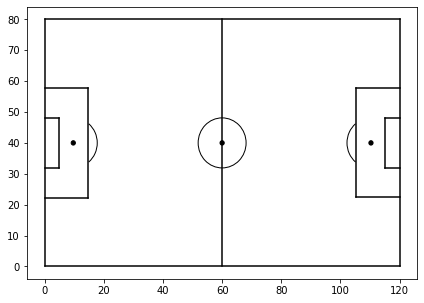

In [5]:
fig=plt.figure()
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)
draw_pitch(ax)
plt.show()

LOADING PLAYER DATA

In [18]:
data_id = [9700, 9717, 9726, 9736, 9742, 9754, 9765, 9774, 9783, 9794, 9799, 9811, 9827]
# consequently read the json and concatenate into a pre-defined dataframe
all_barcelona = pd.DataFrame()
for i in data_id:
    with open('/content/open-data/data/events/'+str(i)+'.json') as data_file:
        data = json.load(data_file)
    df = json_normalize(data, sep = '_')
    if all_barcelona.empty:
        all_barcelona = df
    else:
        all_barcelona = pd.concat([all_barcelona, df], join = 'outer', sort = False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  import sys


In [67]:
player_name = input()

Cristiano Ronaldo dos Santos Aveiro


In [68]:
player_data = df[(df["player_name"] == player_name)]
print(player_data.head())
arr = np.unique(player_data['type_name'])
arr

Empty DataFrame
Columns: [id, index, period, timestamp, minute, second, possession, duration, type_id, type_name, possession_team_id, possession_team_name, play_pattern_id, play_pattern_name, team_id, team_name, tactics_formation, tactics_lineup, related_events, location, player_id, player_name, position_id, position_name, pass_recipient_id, pass_recipient_name, pass_length, pass_angle, pass_height_id, pass_height_name, pass_end_location, pass_type_id, pass_type_name, pass_body_part_id, pass_body_part_name, carry_end_location, under_pressure, pass_outcome_id, pass_outcome_name, ball_receipt_outcome_id, ball_receipt_outcome_name, counterpress, duel_type_id, duel_type_name, pass_aerial_won, foul_committed_type_id, foul_committed_type_name, pass_switch, pass_through_ball, pass_technique_id, pass_technique_name, dribble_outcome_id, dribble_outcome_name, duel_outcome_id, duel_outcome_name, interception_outcome_id, interception_outcome_name, foul_committed_card_id, foul_committed_card_name, 

array([], dtype=object)

In [64]:
passes = pressure = carry = ball_recipt = ball_recovery = block = dribble = dribble_past = duel = foul_won = interception = miscontrol = shot = substitution = 0
for i in player_data['type_name']:
  if i == "Pass":
    passes += 1
  elif i == "Carry":
    carry += 1
  elif i == "Pressure":
    pressure += 1
  elif i == "Ball Receipt*":
    ball_recipt += 1
  elif i == "Ball Recovery":
    ball_recovery += 1
  elif i == "Block*":
    block += 1
  elif i == "Dribble":
    dribble += 1
  elif i == "Dribbled Past":
    dribble_past += 1
  elif i == "Duel":
    duel += 1
  elif i == "Foul Won":
    foul_won += 1
  elif i == "Interception":
    interception += 1
  elif i == "Miscontrol":
    miscontrol += 1
  elif i == "Shot":
    shot += 1
  elif i == "Substitution":
    substitution += 1 
print(passes, pressure, carry, ball_recipt, ball_recovery, block, dribble, dribble_past, duel, foul_won, interception, miscontrol, shot, substitution)

42 11 56 57 5 0 6 0 2 6 0 3 4 0


In [16]:
#code for radar(profile) creation

In [10]:
#rest of code of pass and heatmap and all

*DATA LICENSE*

In [11]:
License_Image = cv2.imread("/content/open-data/img/statsbomb-logo.jpg")
cv2_imshow(License_Image)

NameError: ignored